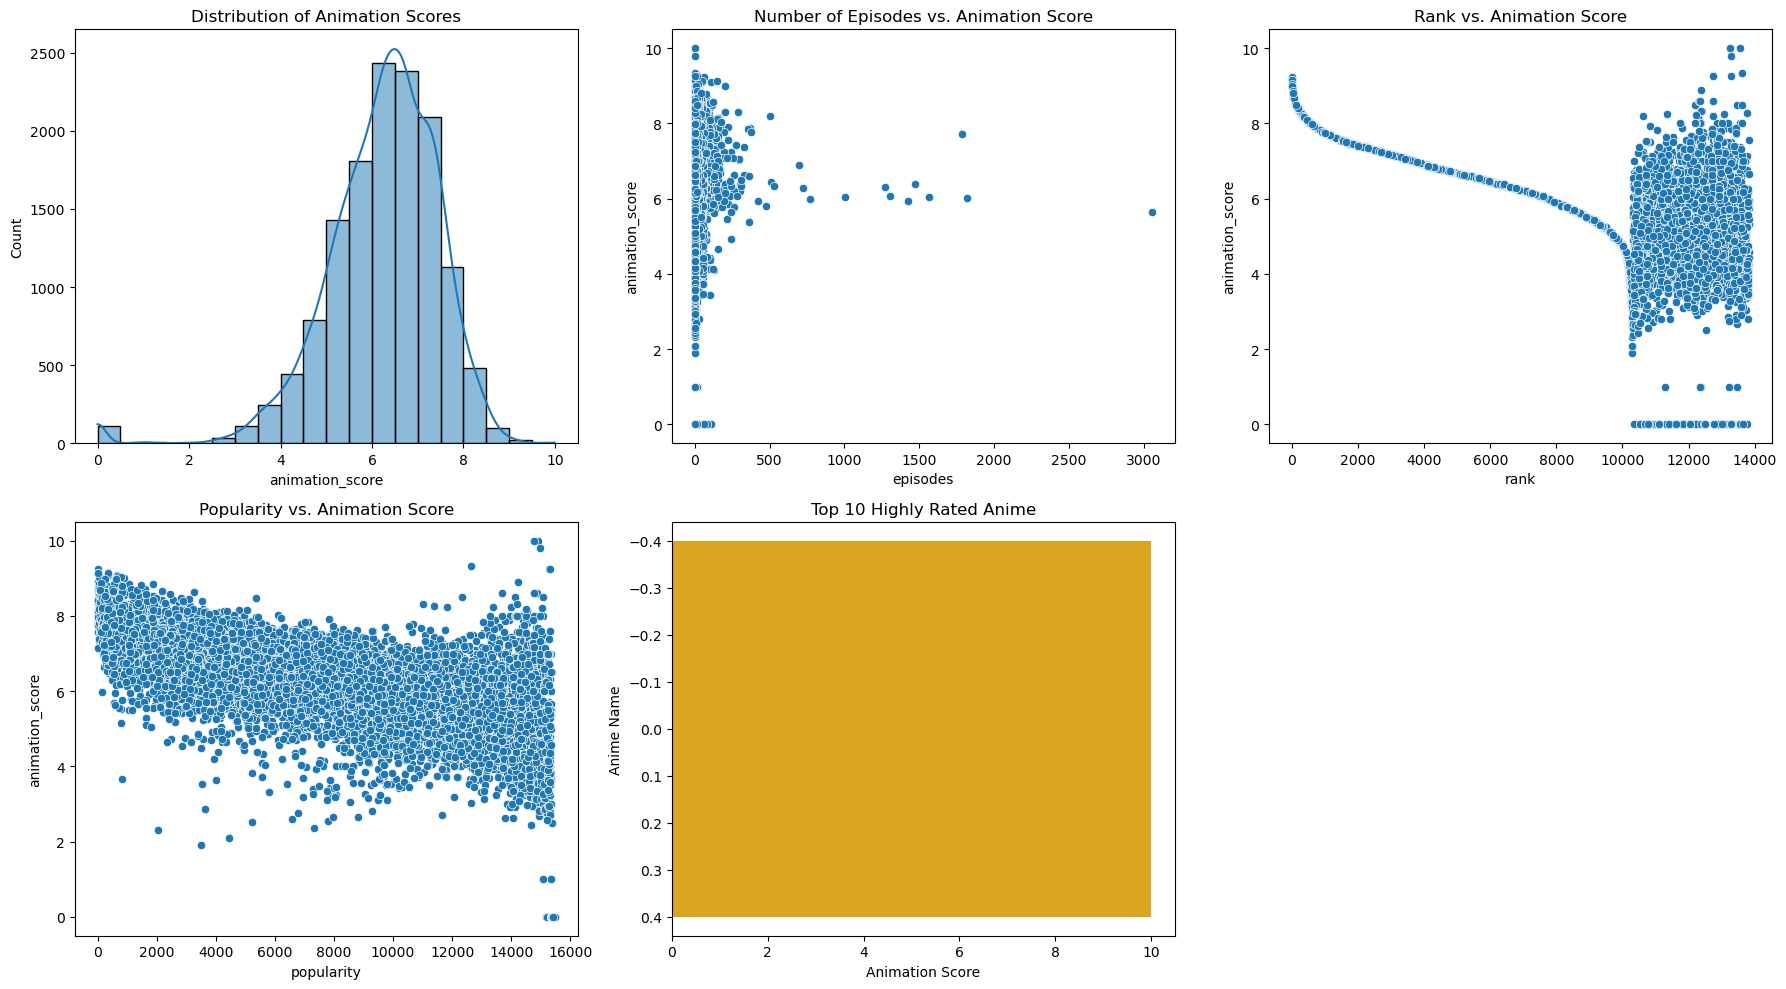

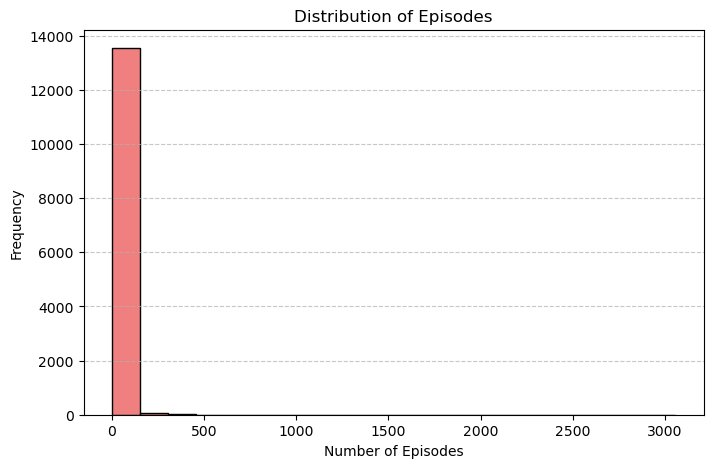

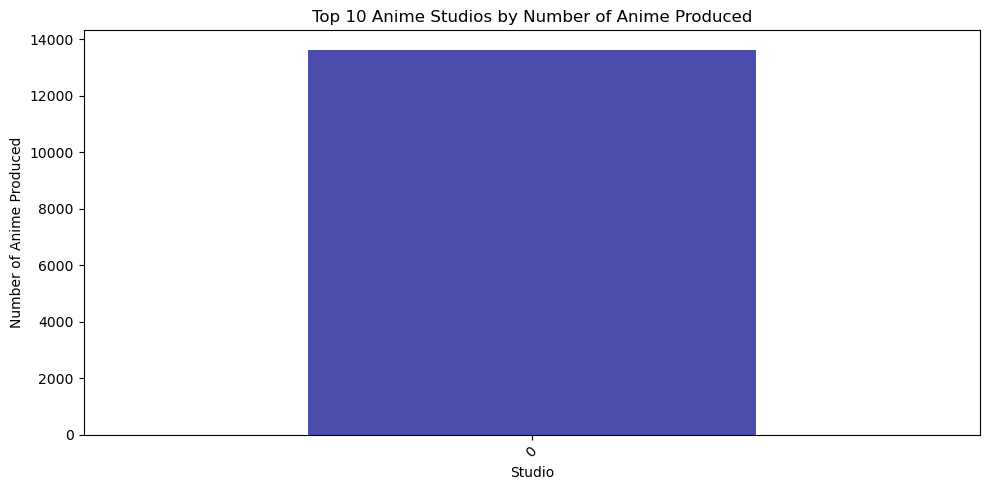

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:\Users\adnsk\Desktop\Anime.csv'
anime_df = pd.read_csv(file_path)

# Ensure consistent lowercase column names
anime_df.columns = anime_df.columns.str.lower()

# Convert numeric columns
anime_df['animation_score'] = pd.to_numeric(anime_df['animation_score'], errors='coerce')
anime_df['episodes'] = pd.to_numeric(anime_df['episodes'], errors='coerce')
anime_df['rank'] = pd.to_numeric(anime_df['rank'], errors='coerce')
anime_df['popularity'] = pd.to_numeric(anime_df['popularity'], errors='coerce')

# Drop rows with missing values in critical columns
anime_df = anime_df.dropna(subset=['episodes', 'animation_score'])

# Table 1: Summary Statistics
summary_statistics = anime_df[['episodes', 'animation_score']].describe()
summary_statistics.to_csv(r'C:\Users\adnsk\Desktop\summary_statistics.csv', index=False)

# Table 2: Top 10 Highly Rated Anime
top_rated_anime = anime_df[['name', 'animation_score']].sort_values(by='animation_score', ascending=False).head(10)
top_rated_anime.to_csv(r'C:\Users\adnsk\Desktop\top_rated_anime.csv', index=False)

# Visualization Section
# Create a figure with subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot 1: Distribution of Animation Scores (Histogram)
sns.histplot(anime_df['animation_score'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Animation Scores")

# Plot 2: Episodes vs. Animation Score (Scatter Plot)
sns.scatterplot(x=anime_df['episodes'], y=anime_df['animation_score'], ax=axes[0, 1])
axes[0, 1].set_title("Number of Episodes vs. Animation Score")

# Plot 3: Rank vs. Animation Score (Scatter Plot)
sns.scatterplot(x=anime_df['rank'], y=anime_df['animation_score'], ax=axes[0, 2])
axes[0, 2].set_title("Rank vs. Animation Score")

# Plot 4: Popularity vs. Animation Score (Scatter Plot)
sns.scatterplot(x=anime_df['popularity'], y=anime_df['animation_score'], ax=axes[1, 0])
axes[1, 0].set_title("Popularity vs. Animation Score")

# Plot 5: Bar Chart - Top 10 Anime by Animation Score
axes[1, 1].barh(top_rated_anime['name'], top_rated_anime['animation_score'], color='goldenrod')
axes[1, 1].set_title("Top 10 Highly Rated Anime")
axes[1, 1].set_xlabel("Animation Score")
axes[1, 1].set_ylabel("Anime Name")
axes[1, 1].invert_yaxis()

# Hide unused subplot
axes[1, 2].axis('off')

# Adjust layout and save the combined visualizations
plt.tight_layout()
plt.savefig(r'C:\Users\adnsk\Desktop\anime_visualizations_combined.png')
plt.show()

# Additional Visualizations
# Distribution of Episodes (Histogram)
plt.figure(figsize=(8, 5))
anime_df['episodes'].plot(kind='hist', bins=20, color='lightcoral', edgecolor='black')
plt.xlabel("Number of Episodes")
plt.ylabel("Frequency")
plt.title("Distribution of Episodes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig(r'C:\Users\adnsk\Desktop\distribution_of_episodes.png')
plt.show()

# Bar Chart - Top 10 Anime Studios by Number of Anime Produced
studio_counts = anime_df['studio'].value_counts().head(10)
plt.figure(figsize=(10, 5))
studio_counts.plot(kind='bar', color='darkblue', alpha=0.7)
plt.xlabel("Studio")
plt.ylabel("Number of Anime Produced")
plt.title("Top 10 Anime Studios by Number of Anime Produced")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r'C:\Users\adnsk\Desktop\top_studios.png')
plt.show()


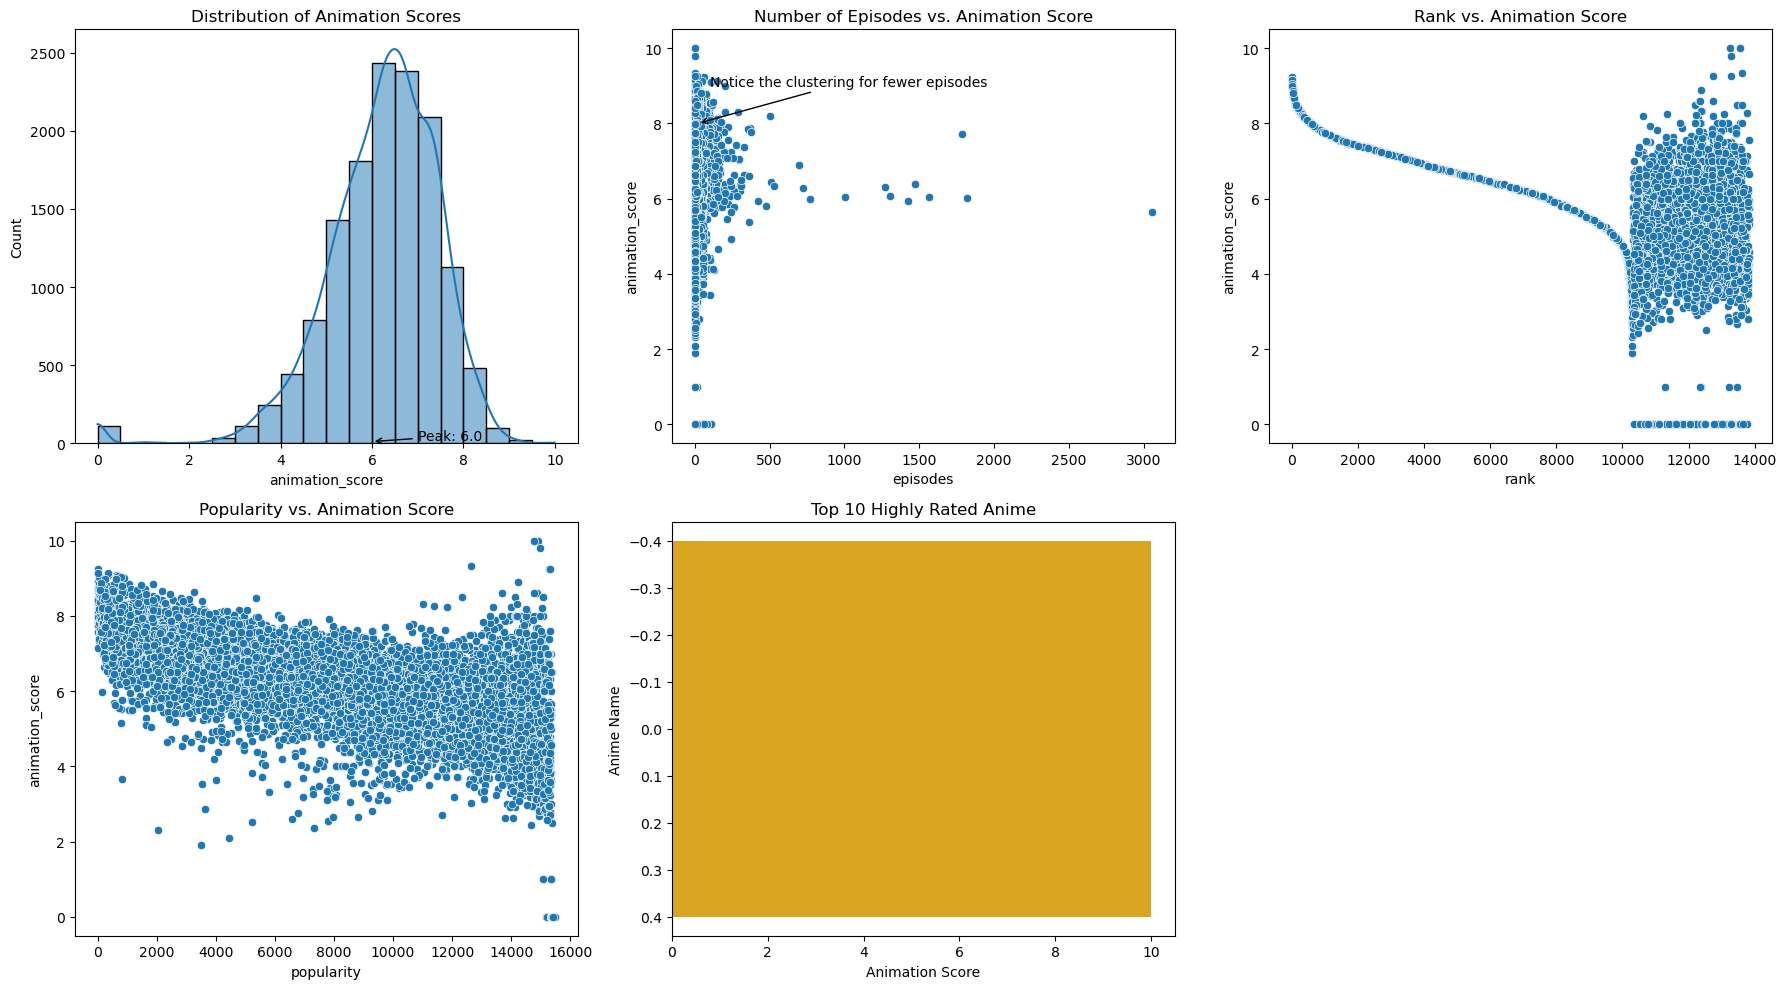

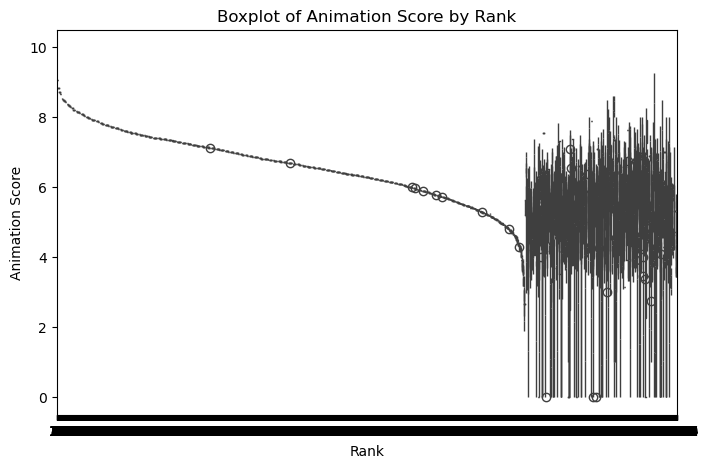

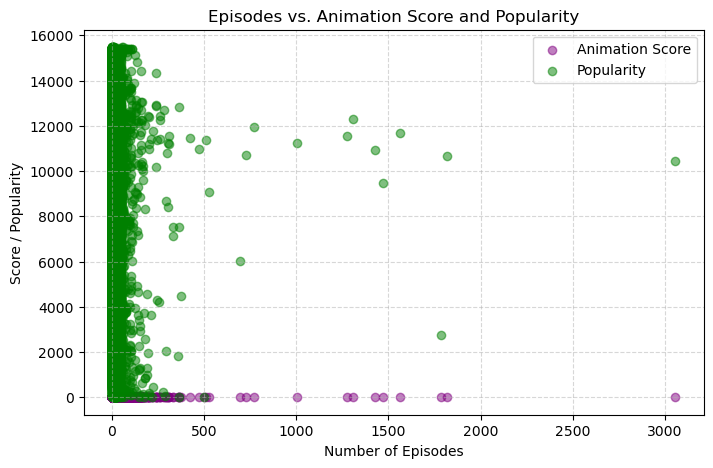

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:\Users\adnsk\Desktop\Anime.csv'
anime_df = pd.read_csv(file_path)

# Ensure consistent lowercase column names
anime_df.columns = anime_df.columns.str.lower()

# Convert numeric columns
anime_df['animation_score'] = pd.to_numeric(anime_df['animation_score'], errors='coerce')
anime_df['episodes'] = pd.to_numeric(anime_df['episodes'], errors='coerce')
anime_df['rank'] = pd.to_numeric(anime_df['rank'], errors='coerce')
anime_df['popularity'] = pd.to_numeric(anime_df['popularity'], errors='coerce')

# Drop rows with missing values in critical columns
anime_df = anime_df.dropna(subset=['episodes', 'animation_score', 'rank', 'popularity'])

# Table 1: Summary Statistics
summary_statistics = anime_df[['episodes', 'animation_score']].describe()
summary_statistics.to_csv(r'C:\Users\adnsk\Desktop\summary_statistics.csv', index=False)

# Table 2: Top 10 Highly Rated Anime
top_rated_anime = anime_df[['name', 'animation_score']].sort_values(by='animation_score', ascending=False).head(10)
top_rated_anime.to_csv(r'C:\Users\adnsk\Desktop\top_rated_anime.csv', index=False)

# Visualization Section
# Create a figure with subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot 1: Distribution of Animation Scores (Histogram)
sns.histplot(anime_df['animation_score'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Animation Scores")

# Add annotation for peak
max_score = anime_df['animation_score'].value_counts().idxmax()
axes[0, 0].annotate(f'Peak: {max_score}', xy=(max_score, 10), xytext=(max_score + 1, 20),
                    arrowprops=dict(facecolor='black', arrowstyle='->'))

# Plot 2: Episodes vs. Animation Score (Scatter Plot)
sns.scatterplot(x=anime_df['episodes'], y=anime_df['animation_score'], ax=axes[0, 1])
axes[0, 1].set_title("Number of Episodes vs. Animation Score")

# Add annotation for trend
axes[0, 1].annotate("Notice the clustering for fewer episodes",
                    xy=(20, 8), xytext=(100, 9),
                    arrowprops=dict(facecolor='blue', arrowstyle='->'))

# Plot 3: Rank vs. Animation Score (Scatter Plot)
sns.scatterplot(x=anime_df['rank'], y=anime_df['animation_score'], ax=axes[0, 2])
axes[0, 2].set_title("Rank vs. Animation Score")

# Plot 4: Popularity vs. Animation Score (Scatter Plot)
sns.scatterplot(x=anime_df['popularity'], y=anime_df['animation_score'], ax=axes[1, 0])
axes[1, 0].set_title("Popularity vs. Animation Score")

# Plot 5: Bar Chart - Top 10 Anime by Animation Score
axes[1, 1].barh(top_rated_anime['name'], top_rated_anime['animation_score'], color='goldenrod')
axes[1, 1].set_title("Top 10 Highly Rated Anime")
axes[1, 1].set_xlabel("Animation Score")
axes[1, 1].set_ylabel("Anime Name")
axes[1, 1].invert_yaxis()

# Hide unused subplot
axes[1, 2].axis('off')

# Adjust layout and save the combined visualizations
plt.tight_layout()
plt.savefig(r'C:\Users\adnsk\Desktop\anime_visualizations_combined.png')
plt.show()

# Additional Visualizations
# Boxplot for Animation Score by Rank
plt.figure(figsize=(8, 5))
sns.boxplot(x='rank', y='animation_score', data=anime_df)
plt.xlabel("Rank")
plt.ylabel("Animation Score")
plt.title("Boxplot of Animation Score by Rank")
plt.savefig(r'C:\Users\adnsk\Desktop\boxplot_rank_vs_animation_score.png')
plt.show()

# Combined Scatter Plot - Popularity and Animation Score vs. Episodes
plt.figure(figsize=(8, 5))
plt.scatter(anime_df['episodes'], anime_df['animation_score'], alpha=0.5, label='Animation Score', color='purple')
plt.scatter(anime_df['episodes'], anime_df['popularity'], alpha=0.5, label='Popularity', color='green')
plt.xlabel("Number of Episodes")
plt.ylabel("Score / Popularity")
plt.title("Episodes vs. Animation Score and Popularity")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig(r'C:\Users\adnsk\Desktop\combined_scatter_plot.png')
plt.show()
